# Case Study : Web Page Words Analysis using Word Cloud 

### Main Goal : Creating Word Cloud of given Data

Steps : 

1. Data Extracting from Given Website
2. Creating wordcloud of Data

Dataset link : https://www.oracle.com/in/what-is-data-science/

Date : 01/feb/2023

## 1. Importing Required Libraries

In [3]:
import requests
from bs4 import BeautifulSoup

## 2. Extracting Data From Website

In [251]:
from tqdm import tqdm
import time

def loading():
    for i in tqdm(range(100), desc="Loading"):
        time.sleep(0.03)

In [250]:
# Requesting url
url = requests.get("https://www.oracle.com/in/what-is-data-science/")
 
# Checking Extractable or not
if url.status_code != 200:print("Not Extracble")
else:print(f"Extractable, Response Code {url.status_code}")

Extractable, Response Code 200


In [27]:
# parsing url
page = BeautifulSoup(url.content, "html.parser")

In [105]:
body = page.body
body

<body class="f20 f20v0 rwtheme-oci">
<!-- Container/Display Start -->
<!-- BEGIN: oWidget_C/_Raw-Text/Display -->
<!-- www-us StartBodyAdminContainer -->
<!-- END: oWidget_C/_Raw-Text/Display -->
<!-- Container/Display end -->
<div class="f20w1">
<!-- Dispatcher:null -->
<!-- BEGIN: oWidget_C/_Raw-Text/Display -->
<!-- U30v0 -->
<style>
#u30{opacity:1 !important;filter:opacity(100%) !important;position:sticky;top:0}
.u30v0{background:#3a3632;height:50px;overflow:hidden;border-top:5px solid #3a3632;border-bottom:5px solid #3a3632}
#u30nav,#u30tools{visibility:hidden}
.u30brand{height:50px;display:flex;flex-direction:column;justify-content:center;align-items:flex-start;max-width:1344px;padding:0 48px;margin:0 auto}
.u30brandw1{display:flex;flex-direction:row;color:#fff;text-decoration:none;align-items:center}
#u30btxt{font-family:sans-serif;font-size:14px;position:relative;margin-left:12px;padding-left:16px;white-space:nowrap;color:#fff;text-decoration:none}
#u30btxt:before{content:'';po

In [195]:
# title 
title = page.title.text
title = [title]
title

['What is Data Science? | Oracle India']

In [196]:
# extracting headings of page
heading = []

for i in body.find_all("h2"):
    j = i.text
    heading.append(j.replace("\n",""))

In [197]:
[x for x in heading]

['Who oversees the data science process?',
 'What is a data scientist?',
 'Challenges of implementing data science projects',
 'The data science platform delivers new capabilities',
 'The benefits of a data science platform',
 'What a data scientist needs in a platform',
 'When a data science platform is the right move']

In [198]:
# Extracting subheading means (supported points)
subheading = []

for strong in body.find_all("strong"):
    j2 = strong.text
    subheading.append(j2.replace("\n",""))    

In [199]:
subheading

['Oracle Cloud Free Tier',
 'Data science topics',
 'Business managers:',
 'IT managers:',
 'Data science managers:',
 'The Data Science Journal',
 'Data scientists can’t work efficiently.',
 'Application developers can’t access usable machine learning.',
 'IT administrators spend too much time on support.',
 'Business managers are too removed from data science.',
 'Choose a project-based UI that encourages collaboration.',
 'Prioritize integration and flexibility.',
 'Include enterprise-grade capabilities.',
 'Make data science more self-service.',
 'Ensure easier model deployment.']

In [200]:
# extracting all paragraph
all_paragraph = []

for x in body.find_all("p"):
    if x.text.find("\xa0"):
        tx = x.text.replace("\xa0", " ")
        tx = tx.replace("\n", "")
        all_paragraph.append(tx)

In [201]:
all_paragraph

["We suggest you try the following to help find what you're looking for:",
 'Oracle Cloud Free Tier',
 'Build, test, and deploy applications by applying natural language processing—for free.',
 'Data science topics',
 'At most organizations, data science projects are typically overseen bythree types of managers:',
 'Business managers:  These managers work with thedata science team to define the problem and develop a strategy foranalysis. They may be the head of a line of business, such as marketing,finance, or sales, and have a data science team reporting to them. Theywork closely with the data science and IT managers to ensure that projectsare delivered.',
 'IT managers:  Senior IT managers are responsible forthe infrastructure and architecture that will support data scienceoperations. They are continually monitoring operations and resource usageto ensure that data science teams operate efficiently and securely. Theymay also be responsible for building and updating IT environments for

#### Merging all extracting data 

In [205]:
print(type(all_paragraph))
print(type(subheading))
print(type(heading))
print(type(title))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [207]:
extracted_text_data = []

while True:
    extracted_text_data.append(title)
    extracted_text_data.append(subheading)
    extracted_text_data.append(heading)
    extracted_text_data.append(all_paragraph)
    break

In [292]:
#extracted_text_data[0]
# extracted_text_data[1]
# extracted_text_data[2]
# extracted_text_data[3]


etd = extracted_text_data


**Note : Data Extraction is Complpleted**

## 3. Creating Word Cloud of Extracted Data

In [221]:
!pip install wordcloud

In [443]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

In [454]:
# generating word cloud
def generating_wordcloud(STOPWORDS, etd):
    # Loading funciton
    loading()
    
    # converting all list into a single string
    single_text = etd[0]+etd[1]+etd[2]+etd[3]

    # changing data type 
    etd1 = str(single_text)
    
    # stopwords
    stopwords = set(STOPWORDS)
#     stopwords = stopwords.words('english')
    
    words = [word for word in etd1.split() if word.lower() not in stopwords]
    new_text = " ".join(words)
#     print(new_text)
    print("Old length: ", len(text))
    print("New length: ", len(new_text))
    
    


    # creating wordcloud
    wordcloud = WordCloud(width= 800, height=800, background_color="white", stopwords = stopwords, min_font_size=10).generate(str(etd1))

    # Plot the wordcloud image
    plt.figure(figsize=(8,8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.savefig('wordcloud.png',dpi=900)
    plt.show()

Loading: 100%|██████████████████████████████████| 100/100 [00:03<00:00, 27.62it/s]


Old length:  129
New length:  7379


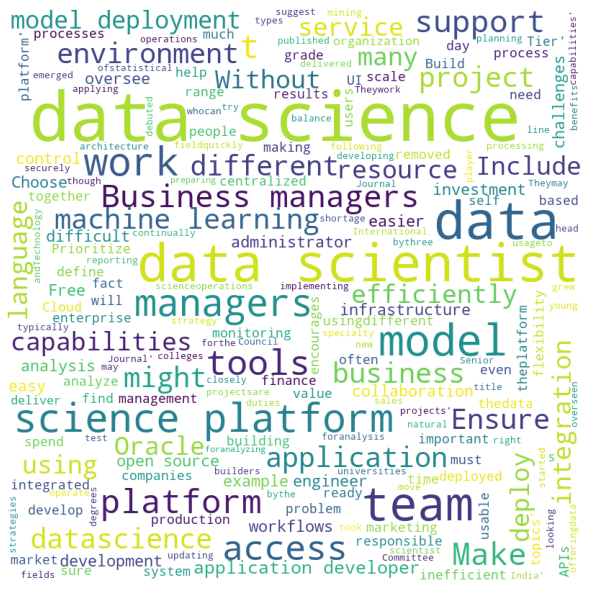

In [455]:
generating_wordcloud(STOPWORDS, etd)

`Insight`

- **Most of the words in the image is data science**. Which means it is the page of the data science field related. 
- After that **data** comes which means. In this artical or page contains data is **most frequent words** after that **Data Science**
- In word cloud, **Size is most important factor**, **Small size refers to the less number of use**. In the Article.

## Conclusion

A **word cloud** (also known as a tag cloud) is a **visual representation of words**. Cloud creators are **used to highlight popular words and phrases** based on **frequency and relevance**. They provide you with **quick and simple visual insights** that can lead to more in-depth analyses.



#  Happy Learning